In [216]:
#importing necessary librarires
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import warnings
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')




In [195]:
df=pd.read_csv('titanic_train.csv')

In [23]:
df.shape

(891, 12)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation:
1.We see there are Nan values present in Age,Cabin and Embarked.We need to fill them.All other features are ok.

# Data Visuvalization

# Sex Feature

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

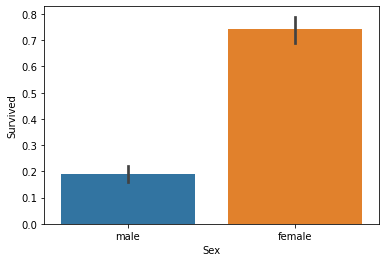

In [10]:
sns.barplot(x="Sex",y="Survived",data=df)

In [17]:
#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


Observation:Females have a much higher chance of survival than males

# Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


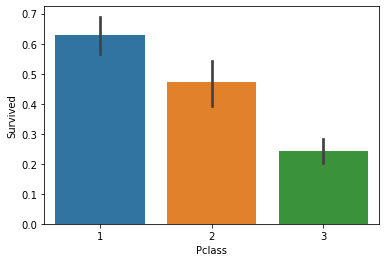

In [20]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Observation:People with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


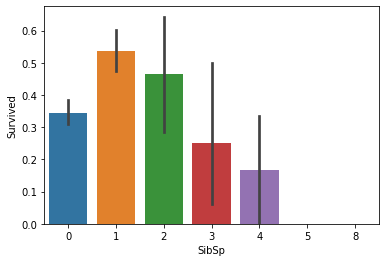

In [22]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Observation:people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

# Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


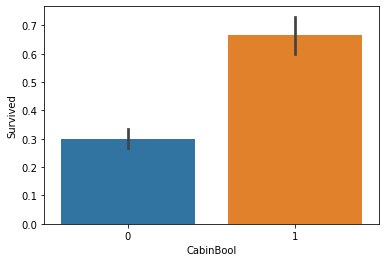

In [34]:
df["CabinBool"] = (df["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", df["Survived"][df["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", df["Survived"][df["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=df)
plt.show()


Observation:People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)

# Age Feature

In [166]:
#sort the ages into logical categories
df["Age"] = df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)


In [167]:
df['AgeGroup']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Student
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

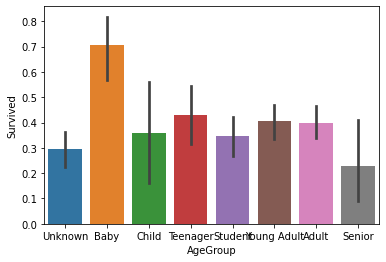

In [38]:
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

Observation:Babies are more likely to survive than any other age group.

# Cleaning Data

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young Adult


In [196]:
#we can drop the Ticket feature since it's unlikely to yield any useful information
df = df.drop(['Ticket'], axis = 1)

In [197]:
#Since 77% of cabin feature is empty.There is no point in keeping it.Its not going to yeild much in Survival prediction,It can be dropped
df = df.drop(['Cabin'], axis = 1)

In [198]:
df = df.drop(['PassengerId'], axis = 1)

## Filling Nan Values

### Embarked Feature

In [199]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)


Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


Observation:It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [200]:
#replacing the missing values in the Embarked feature with S
df=df.fillna({"Embarked": "S"})

### Age Feature

In [180]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [201]:
df['Title']=df.Name.str.extract('([A-Za-z]+)\.', expand=False)


In [202]:
#replace various titles with more common names

df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona','Countess','Sir'], 'Rare')
    

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [203]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace= True)

### Drop Name Feature


We can drop the name feature now that we've extracted the titles.

In [204]:
df = df.drop(['Name'], axis = 1)

# Encoding

## Title feature

In [205]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)

In [206]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


## Embarked feature

In [207]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)


## Age Feature

In [208]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
df.loc[ df['Age'] > 62, 'Age'] = 4

In [209]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1.0,1,0,7.2500,1,1
1,1,1,female,3.0,1,0,71.2833,2,3
2,1,3,female,1.0,0,0,7.9250,1,2
3,1,1,female,2.0,1,0,53.1000,1,3
4,0,3,male,2.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,2.0,0,0,13.0000,1,5
887,1,1,female,1.0,0,0,30.0000,1,2
888,0,3,female,1.0,1,2,23.4500,1,2
889,1,1,male,1.0,0,0,30.0000,2,1


In [190]:
df['Age'].value_counts()

2.0    336
1.0    255
3.0    181
0.0    104
4.0     15
Name: Age, dtype: int64

## Sex Feature

In [210]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,1,1
1,1,1,1,3.0,1,0,71.2833,2,3
2,1,3,1,1.0,0,0,7.9250,1,2
3,1,1,1,2.0,1,0,53.1000,1,3
4,0,3,0,2.0,0,0,8.0500,1,1


## Fare Feature

In [214]:
df.loc[df['Fare'] <= 17, 'Fare'] = 0
df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1
df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2
df.loc[df['Fare'] >= 100, 'Fare'] = 3

In [215]:
df['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

# Splitting and training the model

In [218]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,1,1
1,1,1,1,3.0,1,0,2.0,2,3
2,1,3,1,1.0,0,0,0.0,1,2
3,1,1,1,2.0,1,0,2.0,1,3
4,0,3,0,2.0,0,0,0.0,1,1


In [223]:
x=df.iloc[:,1:]
y=df["Survived"]

# Logistic Regression

In [225]:
#splitting the dataframe
maxAccu=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("the max acc is ",maxAccu," at rs ",maxRS)

the max acc is  0.888268156424581  at rs  417


In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=417)

# GaussianNB

In [235]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
accuracy_score(y_pred, y_test)


0.8491620111731844

# SVC

In [236]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_pred, y_test)

0.88268156424581

# Decision Tree

In [237]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
accuracy_score(y_pred, y_test)

0.8268156424581006

# Random Forest

In [238]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
accuracy_score(y_pred, y_test)

0.8324022346368715

# Logistic Regression

In [239]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
accuracy_score(y_test,pred_test)

0.888268156424581

# KNN

In [240]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_pred, y_test)


0.8212290502793296

# Cross Validation Score

In [241]:
scr=cross_val_score(lr,x,y,cv=5)
print("the cross validation score for logistic regression is",scr.mean())

the cross validation score for logistic regression is 0.8193019898311469


In [242]:
scr2=cross_val_score(decisiontree,x,y,cv=5)
print("the cross validation score for decision tree classifier is",scr2.mean())

the cross validation score for decision tree classifier is 0.7856506182913815


In [243]:
scr3=cross_val_score(randomforest,x,y,cv=5)
print("the cross validation score for random forest classifier is",scr3.mean())

the cross validation score for random forest classifier is 0.792379637185362


In [244]:
scr4=cross_val_score(svc,x,y,cv=5)
print("the cross validation score for support vector classifier is",scr4.mean())

the cross validation score for support vector classifier is 0.8260059004456719


In [245]:
scr5=cross_val_score(knn,x,y,cv=5)
print("the cross validation score for support vector classifier is",scr5.mean())

the cross validation score for support vector classifier is 0.7991212102190698


In [247]:
scr6=cross_val_score(gaussian,x,y,cv=5)
print("the cross validation score for support vector classifier is",scr6.mean())

the cross validation score for support vector classifier is 0.7879040863724814


# Hyper Parameter Tuning for Support Vector Classifier

In [249]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [250]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [252]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.685 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.832 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.838 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [253]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [254]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1)


In [261]:
pred_y=grid.best_estimator_.predict(x_test)

In [262]:
accuracy_score(y_test,pred_y)

0.88268156424581

In [260]:
print(confusion_matrix(y_test,pred_y))

[[110   5]
 [ 16  48]]


# AOC ROC Curve

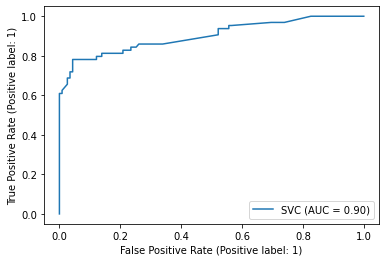

In [263]:
plot_roc_curve(grid.best_estimator_,x_test,y_test)

Final Accuracy Score is 88% and Good AUC roc score of 90%

# Saving the best model

In [265]:
joblib.dump(grid.best_estimator_,"titanic.pkl")

['titanic.pkl']